# Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

# Loading Dataset

In [6]:
df = pd.read_csv('Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [8]:
# shape of the dataset
df.shape

(31962, 3)

# Preprocessing the dataset

In [9]:
# read firts 5 rows
df.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [10]:
# read last 5 rows
df.tail(5)

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


1. Remove pattern in the input text


In [11]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [9]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


2. Remove twitter handles (@user)

In [12]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


3. Remove special characters, numbers, and punctuations

In [13]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-z A-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


4. Remove short words

In [14]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


 Individual words considered as tokens

In [15]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: clean_tweet, dtype: object

Stem the words

In [16]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply (lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: clean_tweet, dtype: object

Combine words into a single sentence

In [17]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


# Exploratory Data Analysis

In [18]:
!pip install wordcloud

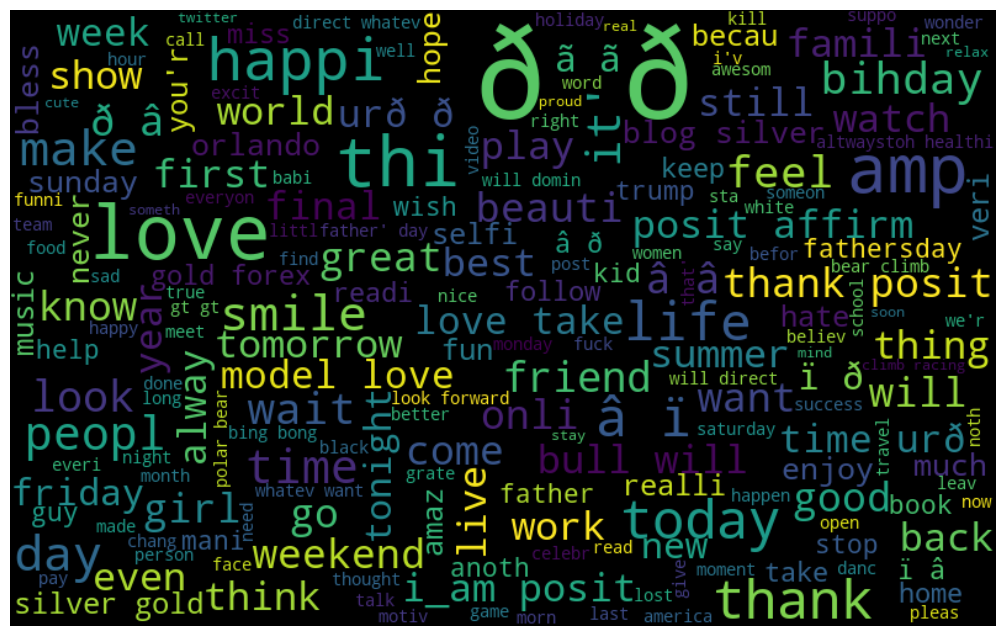

In [19]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

1. Visualization for positive words

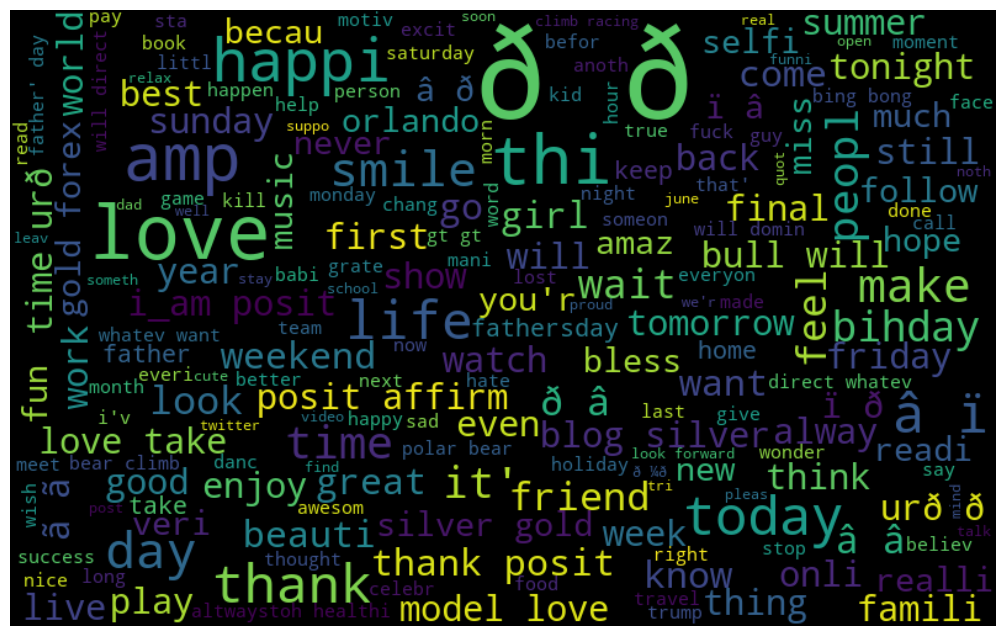

In [20]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

2. Visualization for negative words

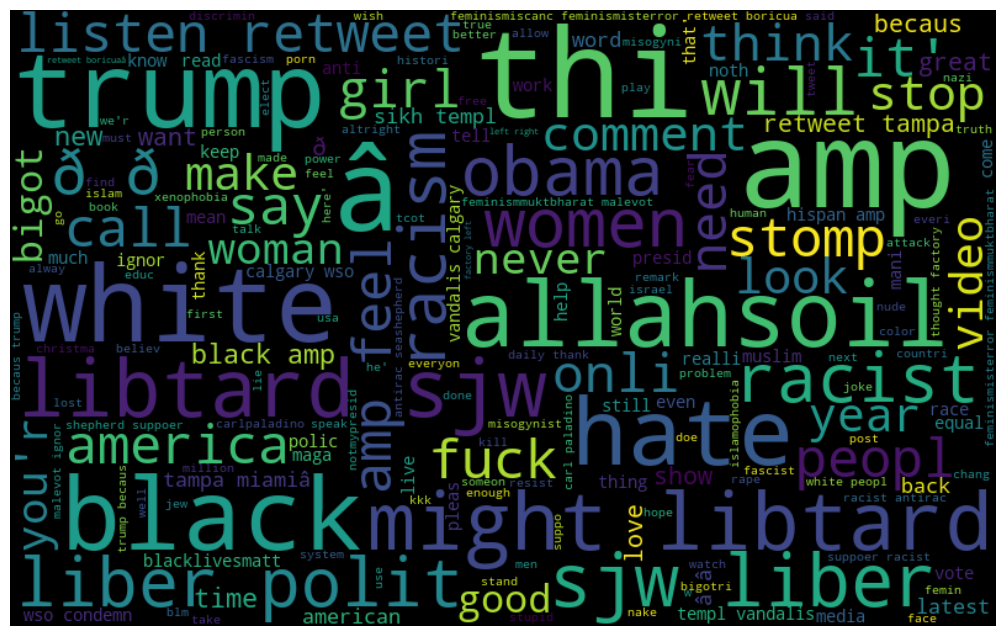

In [21]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Extract the hashtag

In [22]:
def hashtag_extract(tweet):
    hashtags = []
    # loop words in the tweet
    for tweet in tweet:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [23]:
# Extract hashtags from non racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label'] == 0])
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [24]:
# Extract hashtags from non racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label'] == 1])
ht_negative[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [25]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [26]:
# Display Single list of first 5 positive hashtag
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [27]:
# Display Single list of first 5 negative hashtag
ht_negative[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

In [28]:
# using NLP
# Frequency of Positive hashtags
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'count': list(freq.values())})
d.head()

,Hashtag,count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


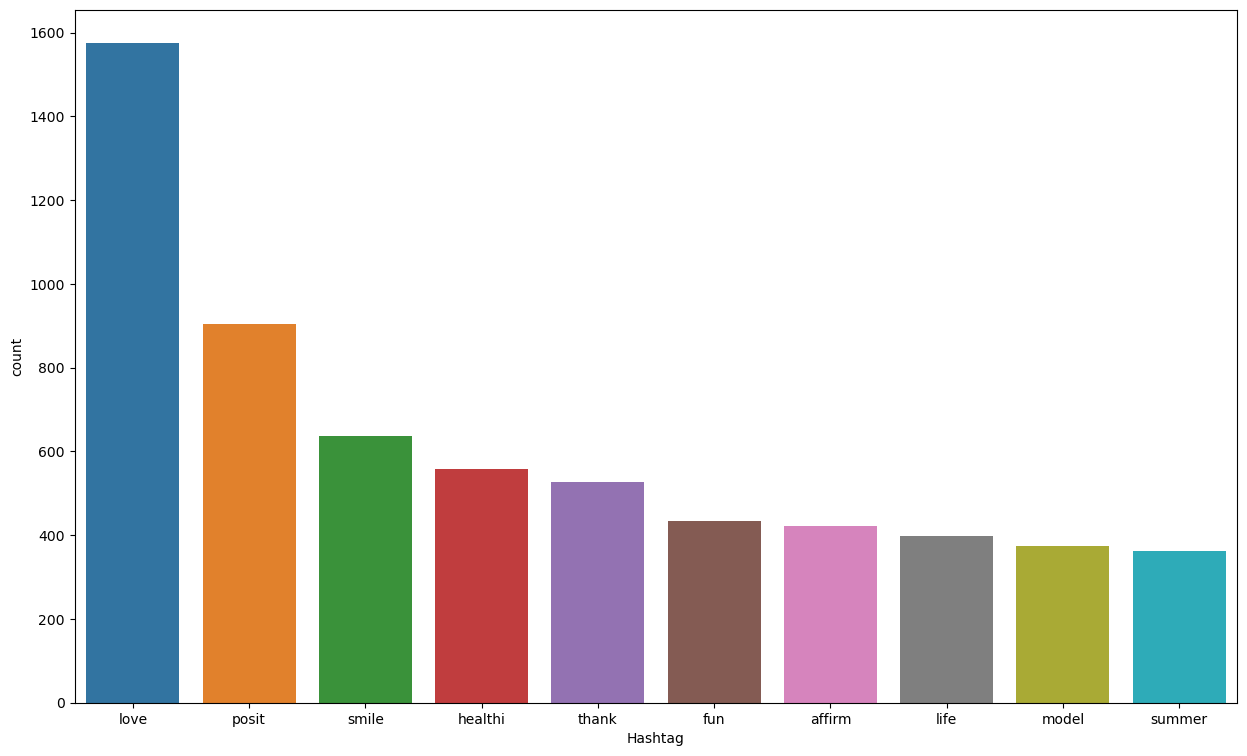

In [29]:
# select top 10 hashtags
d = d.nlargest(columns='count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='count')
plt.show()

We observed that in top 10 positive hashtags of non racist/sexist tweets:

'love' is highest around 1550 and 'summer' is least around 400.

In [30]:
# Frequency of Negative hashtags
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'count': list(freq.values())})
d.head()

,Hashtag,count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


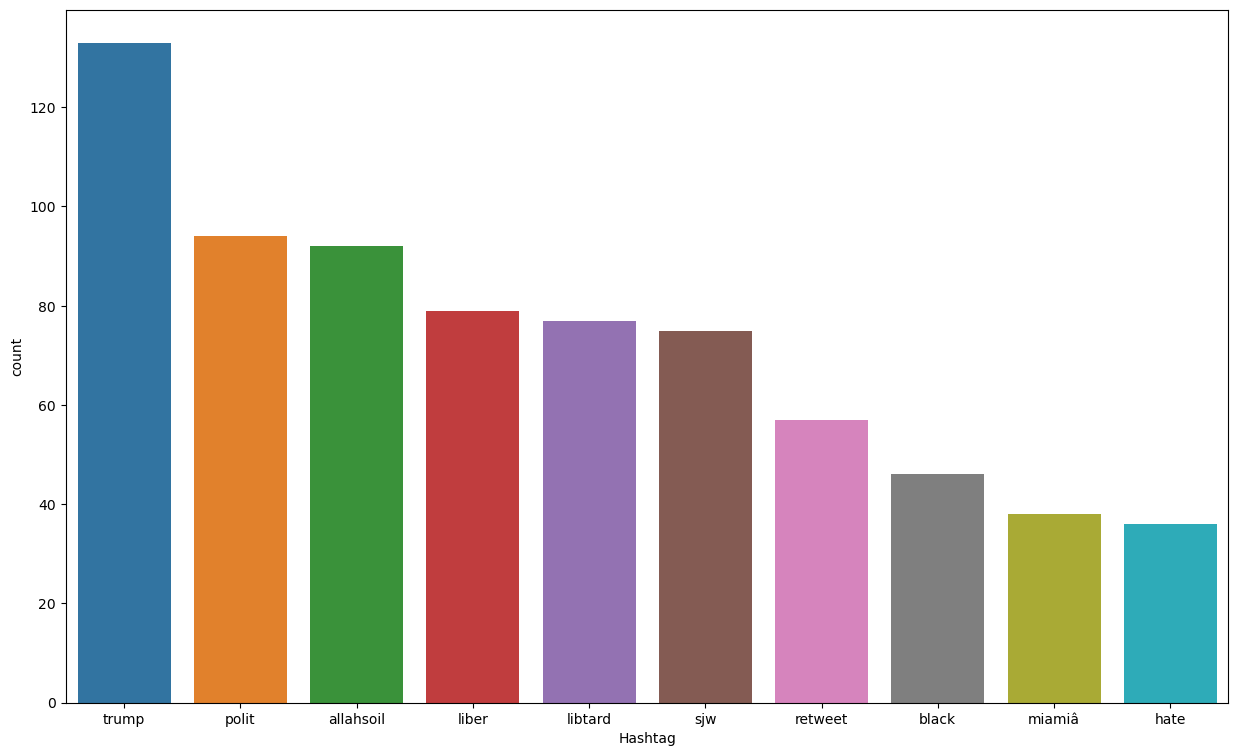

In [60]:
# select top 10 hashtags
d = d.nlargest(columns='count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='count')
plt.show()

We observed that in top 10 negative hashtags of racist/sexist tweets:

'trump' is highest around 130 and 'hate' is least around 40.

# Input Split

In [31]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [2]:
# bow[0].toarray()

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

# Model Training

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [41]:
# training 
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [36]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.5083135391923991

In [46]:
accuracy_score(y_test, pred)

0.9481917156801402

In [49]:
# use probability to get the output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(int)

f1_score(y_test, pred)

0.560856864654333

In [50]:
accuracy_score(y_test, pred)

0.9435615066950319

In [51]:
pred_prob[0]

array([9.99270516e-01, 7.29483887e-04])

In [52]:
from sklearn.metrics import classification_report, accuracy_score

In [53]:
score = accuracy_score(y_test, pred)
print("\nAccuracy score :", score*100)
report = classification_report(y_test, pred)
print("\nClassification Report :\n", report)


Accuracy score : 94.3561506695032

Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      7432
           1       0.62      0.52      0.56       559

    accuracy                           0.94      7991
   macro avg       0.79      0.75      0.77      7991
weighted avg       0.94      0.94      0.94      7991



In [54]:
# Pie Chart
df['label'].value_counts(normalize=True)

label
0    0.929854
1    0.070146
Name: proportion, dtype: float64

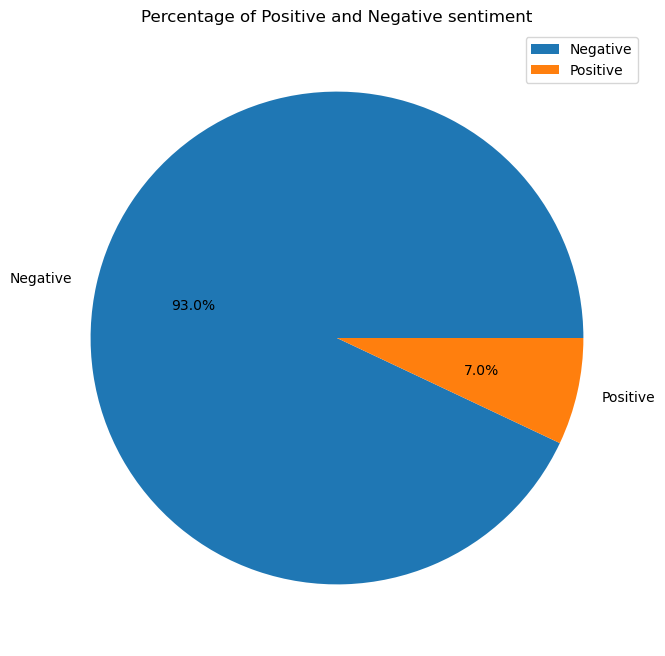

In [58]:
plt.figure(figsize=(10,8))
plt.pie(df['label'].value_counts(), labels = ['Negative', 'Positive'], autopct = '%1.1f%%')
plt.title("Percentage of Positive and Negative sentiment")
plt.legend()
plt.show()

'OBSERVATIONS':


93% people have negative sentiments or racist/sexist tweets

7% people have positive sentiments or non racist/sexist tweets

Number of Negative Sentiments are greater than Positive sentiments